In [1]:
from sympy import Matrix, Symbol, derive_by_array, Lambda, Function, MatrixSymbol, Derivative, diff, symbols
from sympy import var
from sympy.abc import x, i, j, a, b


from sympy.interactive import init_printing

init_printing(pretty_print=True, wrap_line=True, num_columns=60)

In [2]:
def myvar(letter: str, i: int, j: int) -> Symbol:
    letter_ij = Symbol('{}_{}{}'.format(letter, i+1, j+1), is_commutative=True)
    return letter_ij


n,m,p = 3,3,2

X = Matrix(n, m, lambda i,j : myvar('x', i, j)); X

⎡x₁₁  x₁₂  x₁₃⎤
⎢             ⎥
⎢x₂₁  x₂₂  x₂₃⎥
⎢             ⎥
⎣x₃₁  x₃₂  x₃₃⎦

In [3]:
W = Matrix(m, p, lambda i,j : myvar('w', i, j)); W

⎡w₁₁  w₁₂⎤
⎢        ⎥
⎢w₂₁  w₂₂⎥
⎢        ⎥
⎣w₃₁  w₃₂⎦

In [4]:
A = MatrixSymbol('X',3,3); Matrix(A)
B = MatrixSymbol('W',3,2)

In [5]:
v = lambda a,b: a*b

vL = Lambda((a,b), a*b)

n = Function('v') #, Lambda((a,b), a*b))

vN = lambda mat1, mat2: Matrix(mat1.shape[0], mat2.shape[1], lambda i, j: Symbol("n_{}{}".format(i+1, j+1))); vN

Nelem = vN(X, W); Nelem

⎡n₁₁  n₁₂⎤
⎢        ⎥
⎢n₂₁  n₂₂⎥
⎢        ⎥
⎣n₃₁  n₃₂⎦

In [6]:
n(X,W)

 ⎛⎡x₁₁  x₁₂  x₁₃⎤  ⎡w₁₁  w₁₂⎤⎞
 ⎜⎢             ⎥  ⎢        ⎥⎟
v⎜⎢x₂₁  x₂₂  x₂₃⎥, ⎢w₂₁  w₂₂⎥⎟
 ⎜⎢             ⎥  ⎢        ⎥⎟
 ⎝⎣x₃₁  x₃₂  x₃₃⎦  ⎣w₃₁  w₃₂⎦⎠

In [7]:
n(A,B)

In [8]:
n(X,W).replace(n, v) # replace works when v = python lambda

⎡w₁₁⋅x₁₁ + w₂₁⋅x₁₂ + w₃₁⋅x₁₃  w₁₂⋅x₁₁ + w₂₂⋅x₁₂ + w₃₂⋅x₁₃⎤
⎢                                                        ⎥
⎢w₁₁⋅x₂₁ + w₂₁⋅x₂₂ + w₃₁⋅x₂₃  w₁₂⋅x₂₁ + w₂₂⋅x₂₂ + w₃₂⋅x₂₃⎥
⎢                                                        ⎥
⎣w₁₁⋅x₃₁ + w₂₁⋅x₃₂ + w₃₁⋅x₃₃  w₁₂⋅x₃₁ + w₂₂⋅x₃₂ + w₃₂⋅x₃₃⎦

In [9]:
n(X,W).subs({n: vL}) # subs works when v = sympy lambda

⎡w₁₁⋅x₁₁ + w₂₁⋅x₁₂ + w₃₁⋅x₁₃  w₁₂⋅x₁₁ + w₂₂⋅x₁₂ + w₃₂⋅x₁₃⎤
⎢                                                        ⎥
⎢w₁₁⋅x₂₁ + w₂₁⋅x₂₂ + w₃₁⋅x₂₃  w₁₂⋅x₂₁ + w₂₂⋅x₂₂ + w₃₂⋅x₂₃⎥
⎢                                                        ⎥
⎣w₁₁⋅x₃₁ + w₂₁⋅x₃₂ + w₃₁⋅x₃₃  w₁₂⋅x₃₁ + w₂₂⋅x₃₂ + w₃₂⋅x₃₃⎦

In [10]:
n(X,W).replace(n, vL)

⎡w₁₁⋅x₁₁ + w₂₁⋅x₁₂ + w₃₁⋅x₁₃  w₁₂⋅x₁₁ + w₂₂⋅x₁₂ + w₃₂⋅x₁₃⎤
⎢                                                        ⎥
⎢w₁₁⋅x₂₁ + w₂₁⋅x₂₂ + w₃₁⋅x₂₃  w₁₂⋅x₂₁ + w₂₂⋅x₂₂ + w₃₂⋅x₂₃⎥
⎢                                                        ⎥
⎣w₁₁⋅x₃₁ + w₂₁⋅x₃₂ + w₃₁⋅x₃₃  w₁₂⋅x₃₁ + w₂₂⋅x₃₂ + w₃₂⋅x₃₃⎦

In [11]:
n(X,W).subs({n: v})# subs() doesn't work when v is python lambda

 ⎛⎡x₁₁  x₁₂  x₁₃⎤  ⎡w₁₁  w₁₂⎤⎞
 ⎜⎢             ⎥  ⎢        ⎥⎟
v⎜⎢x₂₁  x₂₂  x₂₃⎥, ⎢w₂₁  w₂₂⎥⎟
 ⎜⎢             ⎥  ⎢        ⎥⎟
 ⎝⎣x₃₁  x₃₂  x₃₃⎦  ⎣w₃₁  w₃₂⎦⎠

In [12]:
Matrix(n(A,B).subs({n: vL}))

⎡W₀₀⋅X₀₀ + W₁₀⋅X₀₁ + W₂₀⋅X₀₂  W₀₁⋅X₀₀ + W₁₁⋅X₀₁ + W₂₁⋅X₀₂⎤
⎢                                                        ⎥
⎢W₀₀⋅X₁₀ + W₁₀⋅X₁₁ + W₂₀⋅X₁₂  W₀₁⋅X₁₀ + W₁₁⋅X₁₁ + W₂₁⋅X₁₂⎥
⎢                                                        ⎥
⎣W₀₀⋅X₂₀ + W₁₀⋅X₂₁ + W₂₀⋅X₂₂  W₀₁⋅X₂₀ + W₁₁⋅X₂₁ + W₂₁⋅X₂₂⎦

In [13]:
#N = v(X, W); N
N = n(A,B); N

In [14]:
N.replace(n, v)

In [15]:
N.replace(n, v).subs({A: X, B:W}) # replacing ariable values after doing function doesn't make the function apply directly on the values (matrices), need to replace values before the function is replaced, so that the function can act on them while they are given/alive.

⎡x₁₁  x₁₂  x₁₃⎤ ⎡w₁₁  w₁₂⎤
⎢             ⎥ ⎢        ⎥
⎢x₂₁  x₂₂  x₂₃⎥⋅⎢w₂₁  w₂₂⎥
⎢             ⎥ ⎢        ⎥
⎣x₃₁  x₃₂  x₃₃⎦ ⎣w₃₁  w₃₂⎦

In [16]:
N.subs({n: vL, A:X, B:W})

⎡w₁₁⋅x₁₁ + w₂₁⋅x₁₂ + w₃₁⋅x₁₃  w₁₂⋅x₁₁ + w₂₂⋅x₁₂ + w₃₂⋅x₁₃⎤
⎢                                                        ⎥
⎢w₁₁⋅x₂₁ + w₂₁⋅x₂₂ + w₃₁⋅x₂₃  w₁₂⋅x₂₁ + w₂₂⋅x₂₂ + w₃₂⋅x₂₃⎥
⎢                                                        ⎥
⎣w₁₁⋅x₃₁ + w₂₁⋅x₃₂ + w₃₁⋅x₃₃  w₁₂⋅x₃₁ + w₂₂⋅x₃₂ + w₃₂⋅x₃₃⎦

In [17]:
Nspec = N.subs({A:X, B:W}).replace(n, v); Nspec

⎡w₁₁⋅x₁₁ + w₂₁⋅x₁₂ + w₃₁⋅x₁₃  w₁₂⋅x₁₁ + w₂₂⋅x₁₂ + w₃₂⋅x₁₃⎤
⎢                                                        ⎥
⎢w₁₁⋅x₂₁ + w₂₁⋅x₂₂ + w₃₁⋅x₂₃  w₁₂⋅x₂₁ + w₂₂⋅x₂₂ + w₃₂⋅x₂₃⎥
⎢                                                        ⎥
⎣w₁₁⋅x₃₁ + w₂₁⋅x₃₂ + w₃₁⋅x₃₃  w₁₂⋅x₃₁ + w₂₂⋅x₃₂ + w₃₂⋅x₃₃⎦

In [18]:
N.diff(N)

In [19]:
N.diff(X)

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

In [20]:
# way 2 of declaring S (better way)
sigma = Function('sigma')

sigmaApply = Function("sigma_apply") #lambda matrix:  matrix.applyfunc(sigma)

sigmaApply_ = lambda matrix: matrix.applyfunc(sigma)

sigmaApply(A)

In [21]:
sigmaApply(A).subs({A: X})

       ⎛⎡x₁₁  x₁₂  x₁₃⎤⎞
       ⎜⎢             ⎥⎟
σ_apply⎜⎢x₂₁  x₂₂  x₂₃⎥⎟
       ⎜⎢             ⎥⎟
       ⎝⎣x₃₁  x₃₂  x₃₃⎦⎠

In [22]:
sigmaApply_(A)

In [23]:
sigmaApply(A).subs({A: X}).replace(sigmaApply, sigmaApply_) # NOTE: subs of functions doesn't work, replace actually evaluates the replaced function!

⎡σ(x₁₁)  σ(x₁₂)  σ(x₁₃)⎤
⎢                      ⎥
⎢σ(x₂₁)  σ(x₂₂)  σ(x₂₃)⎥
⎢                      ⎥
⎣σ(x₃₁)  σ(x₃₂)  σ(x₃₃)⎦

In [24]:
S = sigmaApply(N); S

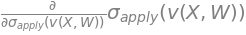

In [25]:
Derivative(S, S)

In [26]:
Derivative(S, S).doit()

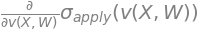

In [27]:
Derivative(S, n(A,B)).doit()

In [28]:
#lambd = Function("lambda")
#Lagain = lambd(sigmaApply(n(A))); Lagain



# diff(Lagain, A) # never execute
#

In [29]:
S.replace(A,X).replace(B,W)

       ⎛ ⎛⎡x₁₁  x₁₂  x₁₃⎤  ⎡w₁₁  w₁₂⎤⎞⎞
       ⎜ ⎜⎢             ⎥  ⎢        ⎥⎟⎟
σ_apply⎜v⎜⎢x₂₁  x₂₂  x₂₃⎥, ⎢w₂₁  w₂₂⎥⎟⎟
       ⎜ ⎜⎢             ⎥  ⎢        ⎥⎟⎟
       ⎝ ⎝⎣x₃₁  x₃₂  x₃₃⎦  ⎣w₃₁  w₃₂⎦⎠⎠

In [30]:
S.replace(n, v)

In [31]:
S.subs({A:X, B:W}).replace(n, v)

       ⎛⎡w₁₁⋅x₁₁ + w₂₁⋅x₁₂ + w₃₁⋅x₁₃  w₁₂⋅x₁₁ + w₂₂⋅x₁₂ + 
       ⎜⎢                                                 
σ_apply⎜⎢w₁₁⋅x₂₁ + w₂₁⋅x₂₂ + w₃₁⋅x₂₃  w₁₂⋅x₂₁ + w₂₂⋅x₂₂ + 
       ⎜⎢                                                 
       ⎝⎣w₁₁⋅x₃₁ + w₂₁⋅x₃₂ + w₃₁⋅x₃₃  w₁₂⋅x₃₁ + w₂₂⋅x₃₂ + 

w₃₂⋅x₁₃⎤⎞
       ⎥⎟
w₃₂⋅x₂₃⎥⎟
       ⎥⎟
w₃₂⋅x₃₃⎦⎠

In [32]:
Sspec = S.subs({A:X, B:W}).replace(n, v).replace(sigmaApply, sigmaApply_)
Sspec

⎡σ(w₁₁⋅x₁₁ + w₂₁⋅x₁₂ + w₃₁⋅x₁₃)  σ(w₁₂⋅x₁₁ + w₂₂⋅x₁₂ + w₃₂
⎢                                                         
⎢σ(w₁₁⋅x₂₁ + w₂₁⋅x₂₂ + w₃₁⋅x₂₃)  σ(w₁₂⋅x₂₁ + w₂₂⋅x₂₂ + w₃₂
⎢                                                         
⎣σ(w₁₁⋅x₃₁ + w₂₁⋅x₃₂ + w₃₁⋅x₃₃)  σ(w₁₂⋅x₃₁ + w₂₂⋅x₃₂ + w₃₂

⋅x₁₃)⎤
     ⎥
⋅x₂₃)⎥
     ⎥
⋅x₃₃)⎦

In [33]:
S.replace(n, vN) #.replace(sigmaApply, sigmaApply_)

       ⎛⎡n₁₁  n₁₂⎤⎞
       ⎜⎢        ⎥⎟
σ_apply⎜⎢n₂₁  n₂₂⎥⎟
       ⎜⎢        ⎥⎟
       ⎝⎣n₃₁  n₃₂⎦⎠

In [34]:
Selem = S.replace(n, vN).replace(sigmaApply, sigmaApply_); Selem

⎡σ(n₁₁)  σ(n₁₂)⎤
⎢              ⎥
⎢σ(n₂₁)  σ(n₂₂)⎥
⎢              ⎥
⎣σ(n₃₁)  σ(n₃₂)⎦

In [35]:
import itertools

elemToSpecD = dict(itertools.chain(*[[(Nelem[i, j], Nspec[i, j]) for j in range(2)] for i in range(3)]))

elemToSpec = list(elemToSpecD.items())

Matrix(elemToSpec)

⎡n₁₁  w₁₁⋅x₁₁ + w₂₁⋅x₁₂ + w₃₁⋅x₁₃⎤
⎢                                ⎥
⎢n₁₂  w₁₂⋅x₁₁ + w₂₂⋅x₁₂ + w₃₂⋅x₁₃⎥
⎢                                ⎥
⎢n₂₁  w₁₁⋅x₂₁ + w₂₁⋅x₂₂ + w₃₁⋅x₂₃⎥
⎢                                ⎥
⎢n₂₂  w₁₂⋅x₂₁ + w₂₂⋅x₂₂ + w₃₂⋅x₂₃⎥
⎢                                ⎥
⎢n₃₁  w₁₁⋅x₃₁ + w₂₁⋅x₃₂ + w₃₁⋅x₃₃⎥
⎢                                ⎥
⎣n₃₂  w₁₂⋅x₃₁ + w₂₂⋅x₃₂ + w₃₂⋅x₃₃⎦

In [36]:
elemToSpecFuncD = dict(itertools.chain(*[[(Nelem[i, j], Function("n_{}{}".format(i + 1, j + 1))(Nspec[i, j])) for j in range(2)] for i in range(3)]))

elemToSpecFunc = list(elemToSpecFuncD.items())

Matrix(elemToSpecFunc)

⎡n₁₁  n₁₁(w₁₁⋅x₁₁ + w₂₁⋅x₁₂ + w₃₁⋅x₁₃)⎤
⎢                                     ⎥
⎢n₁₂  n₁₂(w₁₂⋅x₁₁ + w₂₂⋅x₁₂ + w₃₂⋅x₁₃)⎥
⎢                                     ⎥
⎢n₂₁  n₂₁(w₁₁⋅x₂₁ + w₂₁⋅x₂₂ + w₃₁⋅x₂₃)⎥
⎢                                     ⎥
⎢n₂₂  n₂₂(w₁₂⋅x₂₁ + w₂₂⋅x₂₂ + w₃₂⋅x₂₃)⎥
⎢                                     ⎥
⎢n₃₁  n₃₁(w₁₁⋅x₃₁ + w₂₁⋅x₃₂ + w₃₁⋅x₃₃)⎥
⎢                                     ⎥
⎣n₃₂  n₃₂(w₁₂⋅x₃₁ + w₂₂⋅x₃₂ + w₃₂⋅x₃₃)⎦

In [37]:
elemToSpecFuncArgsD = dict(itertools.chain(*[[(Nelem[i, j], Function("n_{}{}".format(i + 1, j + 1))(*X,*W)) for j in range(2)] for i in range(3)]))

elemToSpecFuncArgs = list(elemToSpecFuncArgsD.items())

Matrix(elemToSpecFuncArgs)

⎡n₁₁  n₁₁(x₁₁, x₁₂, x₁₃, x₂₁, x₂₂, x₂₃, x₃₁, x₃₂, x₃₃, w₁₁
⎢                                                         
⎢n₁₂  n₁₂(x₁₁, x₁₂, x₁₃, x₂₁, x₂₂, x₂₃, x₃₁, x₃₂, x₃₃, w₁₁
⎢                                                         
⎢n₂₁  n₂₁(x₁₁, x₁₂, x₁₃, x₂₁, x₂₂, x₂₃, x₃₁, x₃₂, x₃₃, w₁₁
⎢                                                         
⎢n₂₂  n₂₂(x₁₁, x₁₂, x₁₃, x₂₁, x₂₂, x₂₃, x₃₁, x₃₂, x₃₃, w₁₁
⎢                                                         
⎢n₃₁  n₃₁(x₁₁, x₁₂, x₁₃, x₂₁, x₂₂, x₂₃, x₃₁, x₃₂, x₃₃, w₁₁
⎢                                                         
⎣n₃₂  n₃₂(x₁₁, x₁₂, x₁₃, x₂₁, x₂₂, x₂₃, x₃₁, x₃₂, x₃₃, w₁₁

, w₁₂, w₂₁, w₂₂, w₃₁, w₃₂)⎤
                          ⎥
, w₁₂, w₂₁, w₂₂, w₃₁, w₃₂)⎥
                          ⎥
, w₁₂, w₂₁, w₂₂, w₃₁, w₃₂)⎥
                          ⎥
, w₁₂, w₂₁, w₂₂, w₃₁, w₃₂)⎥
                          ⎥
, w₁₂, w₂₁, w₂₂, w₃₁, w₃₂)⎥
                          ⎥
, w₁₂, w₂₁, w₂₂, w₃₁, w₃₂)⎦

In [38]:
Selem

⎡σ(n₁₁)  σ(n₁₂)⎤
⎢              ⎥
⎢σ(n₂₁)  σ(n₂₂)⎥
⎢              ⎥
⎣σ(n₃₁)  σ(n₃₂)⎦

In [39]:
Selem.subs(elemToSpecD)

⎡σ(w₁₁⋅x₁₁ + w₂₁⋅x₁₂ + w₃₁⋅x₁₃)  σ(w₁₂⋅x₁₁ + w₂₂⋅x₁₂ + w₃₂
⎢                                                         
⎢σ(w₁₁⋅x₂₁ + w₂₁⋅x₂₂ + w₃₁⋅x₂₃)  σ(w₁₂⋅x₂₁ + w₂₂⋅x₂₂ + w₃₂
⎢                                                         
⎣σ(w₁₁⋅x₃₁ + w₂₁⋅x₃₂ + w₃₁⋅x₃₃)  σ(w₁₂⋅x₃₁ + w₂₂⋅x₃₂ + w₃₂

⋅x₁₃)⎤
     ⎥
⋅x₂₃)⎥
     ⎥
⋅x₃₃)⎦

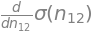

In [40]:
Selem[0,1].diff(Nelem[0,1])

In [41]:
Selem[0,1].diff(Nelem[0,1]).subs({Nelem[0,1] : Nspec[0,1]})
#Selem[0,1].diff(Nelem[0,1]).subs(dict([{Nelem[0,1] : Nspec[0,1]}]))

⎛ d          ⎞│                               
⎜────(σ(n₁₂))⎟│                               
⎝dn₁₂        ⎠│n₁₂=w₁₂⋅x₁₁ + w₂₂⋅x₁₂ + w₃₂⋅x₁₃

In [42]:
Selem[0,1].diff(Nelem[0,1]).subs({Nelem[0,1] : Nspec[0,1]}).subs({Nspec[0,1] : 23})

⎛ d          ⎞│      
⎜────(σ(n₁₂))⎟│      
⎝dn₁₂        ⎠│n₁₂=23

In [43]:
Selem[0,1].diff(Nelem[0,1]).subs({Nelem[0,1] : Nspec[0,1]}).replace(sigma, lambda x: 8*x**3)

⎛ d  ⎛     3⎞⎞│                               
⎜────⎝8⋅n₁₂ ⎠⎟│                               
⎝dn₁₂        ⎠│n₁₂=w₁₂⋅x₁₁ + w₂₂⋅x₁₂ + w₃₂⋅x₁₃

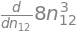

In [44]:
Selem[0,1].diff(Nelem[0,1]).replace(sigma, lambda x: 8*x**3)

In [45]:
Selem[0,1].diff(Nelem[0,1]).replace(sigma, lambda x: 8*x**3).doit()

In [46]:
# ### GOT IT: can replace now with expression and do derivative with respect to that expression.
Selem[0,1].diff(Nelem[0,1]).subs({Nelem[0,1] : Nspec[0,1]}).replace(sigma, lambda x: 8*x**3).doit()

In [47]:
Selem[0,1].subs({Nelem[0,1] : Nspec[0,1]}).diff(X[0,1])#.subs({Nelem[0,1] : Nspec[0,1]})

    ⎛ d        ⎞│                              
w₂₂⋅⎜───(σ(ξ₁))⎟│                              
    ⎝dξ₁       ⎠│ξ₁=w₁₂⋅x₁₁ + w₂₂⋅x₁₂ + w₃₂⋅x₁₃

In [48]:
Selem

⎡σ(n₁₁)  σ(n₁₂)⎤
⎢              ⎥
⎢σ(n₂₁)  σ(n₂₂)⎥
⎢              ⎥
⎣σ(n₃₁)  σ(n₃₂)⎦

In [49]:
nt = Nelem.subs(elemToSpecFunc); nt

⎡n₁₁(w₁₁⋅x₁₁ + w₂₁⋅x₁₂ + w₃₁⋅x₁₃)  n₁₂(w₁₂⋅x₁₁ + w₂₂⋅x₁₂ +
⎢                                                         
⎢n₂₁(w₁₁⋅x₂₁ + w₂₁⋅x₂₂ + w₃₁⋅x₂₃)  n₂₂(w₁₂⋅x₂₁ + w₂₂⋅x₂₂ +
⎢                                                         
⎣n₃₁(w₁₁⋅x₃₁ + w₂₁⋅x₃₂ + w₃₁⋅x₃₃)  n₃₂(w₁₂⋅x₃₁ + w₂₂⋅x₃₂ +

 w₃₂⋅x₁₃)⎤
         ⎥
 w₃₂⋅x₂₃)⎥
         ⎥
 w₃₂⋅x₃₃)⎦

In [50]:
st = Selem.subs(elemToSpecFunc); st

⎡σ(n₁₁(w₁₁⋅x₁₁ + w₂₁⋅x₁₂ + w₃₁⋅x₁₃))  σ(n₁₂(w₁₂⋅x₁₁ + w₂₂⋅
⎢                                                         
⎢σ(n₂₁(w₁₁⋅x₂₁ + w₂₁⋅x₂₂ + w₃₁⋅x₂₃))  σ(n₂₂(w₁₂⋅x₂₁ + w₂₂⋅
⎢                                                         
⎣σ(n₃₁(w₁₁⋅x₃₁ + w₂₁⋅x₃₂ + w₃₁⋅x₃₃))  σ(n₃₂(w₁₂⋅x₃₁ + w₂₂⋅

x₁₂ + w₃₂⋅x₁₃))⎤
               ⎥
x₂₂ + w₃₂⋅x₂₃))⎥
               ⎥
x₃₂ + w₃₂⋅x₃₃))⎦

In [51]:

init_printing(num_columns=10, wrap_line=True, pretty_print=True)#




st.diff(nt)

⎡⎡      
⎢⎢──────
⎢⎢∂n₁₁(w
⎢⎢      
⎢⎢      
⎢⎢      
⎢⎣      
⎢       
⎢⎡      
⎢⎢      
⎢⎢      
⎢⎢──────
⎢⎢∂n₂₁(w
⎢⎢      
⎢⎣      
⎢       
⎢⎡      
⎢⎢      
⎢⎢      
⎢⎢      
⎢⎢      
⎢⎢──────
⎣⎣∂n₃₁(w

        
────────
₁₁⋅x₁₁ +
        
        
        
        
        
        
        
        
────────
₁₁⋅x₂₁ +
        
        
        
        
        
        
        
        
────────
₁₁⋅x₃₁ +

  ∂     
────────
 w₂₁⋅x₁₂
        
        
        
        
        
        
        
  ∂     
────────
 w₂₁⋅x₂₂
        
        
        
        
        
        
        
  ∂     
────────
 w₂₁⋅x₃₂

        
────────
 + w₃₁⋅x
        
        
        
        
        
        
        
        
────────
 + w₃₁⋅x
        
        
        
        
        
        
        
        
────────
 + w₃₁⋅x

        
───(σ(n₁
₁₃)     
        
    0   
        
    0   
        
    0   
        
        
───(σ(n₂
₂₃)     
        
    0   
        
    0   
        
    0 

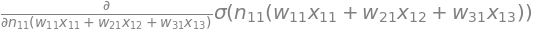

In [52]:
st[0,0].diff(st[0,0].args[0])

In [53]:
st[0,0].diff(X[0,0])

        
w₁₁⋅────
    ∂n₁₁

        
────────
(w₁₁⋅x₁₁

    ∂   
────────
 + w₂₁⋅x

        
────────
₁₂ + w₃₁

        
─────(σ(
⋅x₁₃)   

        
n₁₁(w₁₁⋅
        

        
x₁₁ + w₂
        

        
₁⋅x₁₂ + 
        

        
w₃₁⋅x₁₃)
        

   ⎛ d  
))⋅⎜───(
   ⎝dξ₁ 

        
n₁₁(ξ₁))
        

⎞│      
⎟│      
⎠│ξ₁=w₁₁

        
        
⋅x₁₁ + w

        
        
₂₁⋅x₁₂ +

        
        
 w₃₁⋅x₁₃

In [54]:
st[0,0].diff(st[1,0].args[0])

In [55]:
Selem.diff(Nelem)

⎡⎡ d    
⎢⎢────(σ
⎢⎢dn₁₁  
⎢⎢      
⎢⎢     0
⎢⎢      
⎢⎣     0
⎢       
⎢⎡     0
⎢⎢      
⎢⎢ d    
⎢⎢────(σ
⎢⎢dn₂₁  
⎢⎢      
⎢⎣     0
⎢       
⎢⎡     0
⎢⎢      
⎢⎢     0
⎢⎢      
⎢⎢ d    
⎢⎢────(σ
⎣⎣dn₃₁  

        
(n₁₁))  
        
        
        
        
        
        
        
        
        
(n₂₁))  
        
        
        
        
        
        
        
        
        
(n₃₁))  
        

 ⎤  ⎡   
0⎥  ⎢0  
 ⎥  ⎢   
 ⎥  ⎢   
0⎥  ⎢0  
 ⎥  ⎢   
0⎦  ⎣0  
        
0⎤  ⎡0  
 ⎥  ⎢   
 ⎥  ⎢   
0⎥  ⎢0  
 ⎥  ⎢   
 ⎥  ⎢   
0⎦  ⎣0  
        
0⎤  ⎡0  
 ⎥  ⎢   
0⎥  ⎢0  
 ⎥  ⎢   
 ⎥  ⎢   
0⎥  ⎢0  
 ⎦  ⎣   

 d      
────(σ(n
dn₁₂    
        
     0  
        
     0  
        
     0  
        
 d      
────(σ(n
dn₂₂    
        
     0  
        
     0  
        
     0  
        
 d      
────(σ(n
dn₃₂    

    ⎤⎤
₁₂))⎥⎥
    ⎥⎥
    ⎥⎥
    ⎥⎥
    ⎥⎥
    ⎦⎥
     ⎥
    ⎤⎥
    ⎥⎥
    ⎥⎥
₂₂))⎥⎥
    ⎥⎥
    ⎥⎥
    ⎦⎥
     ⎥
    ⎤⎥
    ⎥⎥
    ⎥⎥
    ⎥⎥
    ⎥⎥
₃₂))⎥⎥
    ⎦⎦

In [56]:
Selem.diff(Nelem).subs(elemToSpecFunc)

⎡⎡      
⎢⎢──────
⎢⎢∂n₁₁(w
⎢⎢      
⎢⎢      
⎢⎢      
⎢⎣      
⎢       
⎢⎡      
⎢⎢      
⎢⎢      
⎢⎢──────
⎢⎢∂n₂₁(w
⎢⎢      
⎢⎣      
⎢       
⎢⎡      
⎢⎢      
⎢⎢      
⎢⎢      
⎢⎢      
⎢⎢──────
⎣⎣∂n₃₁(w

        
────────
₁₁⋅x₁₁ +
        
        
        
        
        
        
        
        
────────
₁₁⋅x₂₁ +
        
        
        
        
        
        
        
        
────────
₁₁⋅x₃₁ +

  ∂     
────────
 w₂₁⋅x₁₂
        
        
        
        
        
        
        
  ∂     
────────
 w₂₁⋅x₂₂
        
        
        
        
        
        
        
  ∂     
────────
 w₂₁⋅x₃₂

        
────────
 + w₃₁⋅x
        
        
        
        
        
        
        
        
────────
 + w₃₁⋅x
        
        
        
        
        
        
        
        
────────
 + w₃₁⋅x

        
───(σ(n₁
₁₃)     
        
    0   
        
    0   
        
    0   
        
        
───(σ(n₂
₂₃)     
        
    0   
        
    0   
        
    0 

In [57]:
# CAN even replace elements after have done an operation on them!!! replacing n_21 * 2 with the number 4.
Sspec.subs({Nspec[0, 0]: 3}).replace(sigma, lambda x: 2 * x).replace(Nspec[2, 1] * 2, 4)




⎡       
⎢       
⎢2⋅w₁₁⋅x
⎢       
⎣2⋅w₁₁⋅x

        
        
₂₁ + 2⋅w
        
₃₁ + 2⋅w

 6      
        
₂₁⋅x₂₂ +
        
₂₁⋅x₃₂ +

        
        
 2⋅w₃₁⋅x
        
 2⋅w₃₁⋅x

    2⋅w₁
        
₂₃  2⋅w₁
        
₃₃      

₂⋅x₁₁ + 
        
₂⋅x₂₁ + 
        
        

2⋅w₂₂⋅x₁
        
2⋅w₂₂⋅x₂
        
    4   

₂ + 2⋅w₃
        
₂ + 2⋅w₃
        
        

₂⋅x₁₃⎤
     ⎥
₂⋅x₂₃⎥
     ⎥
     ⎦

In [58]:
lambd = Function("lambda")
lambd_ = lambda matrix : sum(matrix)


vN(X, W)

⎡n₁₁  n₁
⎢       
⎢n₂₁  n₂
⎢       
⎣n₃₁  n₃

₂⎤
 ⎥
₂⎥
 ⎥
₂⎦

In [59]:
vN(A, B)

⎡n₁₁  n₁
⎢       
⎢n₂₁  n₂
⎢       
⎣n₃₁  n₃

₂⎤
 ⎥
₂⎥
 ⎥
₂⎦

In [60]:
L = lambd(S); L

In [61]:
Nelem

⎡n₁₁  n₁
⎢       
⎢n₂₁  n₂
⎢       
⎣n₃₁  n₃

₂⎤
 ⎥
₂⎥
 ⎥
₂⎦

In [62]:
L.replace(n, vN)

 ⎛      
 ⎜      
λ⎜σ_appl
 ⎜      
 ⎝      

 ⎛⎡n₁₁  
 ⎜⎢     
y⎜⎢n₂₁  
 ⎜⎢     
 ⎝⎣n₃₁  

n₁₂⎤⎞⎞
   ⎥⎟⎟
n₂₂⎥⎟⎟
   ⎥⎟⎟
n₃₂⎦⎠⎠

In [63]:
L.replace(n, vN).replace(sigmaApply, sigmaApply_)

 ⎛⎡σ(n₁₁
 ⎜⎢     
λ⎜⎢σ(n₂₁
 ⎜⎢     
 ⎝⎣σ(n₃₁

)  σ(n₁₂
        
)  σ(n₂₂
        
)  σ(n₃₂

)⎤⎞
 ⎥⎟
)⎥⎟
 ⎥⎟
)⎦⎠

In [64]:
L.replace(n, v)

In [65]:

L.replace(n, v).replace(sigmaApply, sigmaApply_)

In [66]:
L.subs({A:X, B:W}).replace(n, vL).replace(sigmaApply, sigmaApply_)

 ⎛⎡σ(w₁₁
 ⎜⎢     
λ⎜⎢σ(w₁₁
 ⎜⎢     
 ⎝⎣σ(w₁₁

⋅x₁₁ + w
        
⋅x₂₁ + w
        
⋅x₃₁ + w

₂₁⋅x₁₂ +
        
₂₁⋅x₂₂ +
        
₂₁⋅x₃₂ +

 w₃₁⋅x₁₃
        
 w₃₁⋅x₂₃
        
 w₃₁⋅x₃₃

)  σ(w₁₂
        
)  σ(w₁₂
        
)  σ(w₁₂

⋅x₁₁ + w
        
⋅x₂₁ + w
        
⋅x₃₁ + w

₂₂⋅x₁₂ +
        
₂₂⋅x₂₂ +
        
₂₂⋅x₃₂ +

 w₃₂⋅x₁₃
        
 w₃₂⋅x₂₃
        
 w₃₂⋅x₃₃

)⎤⎞
 ⎥⎟
)⎥⎟
 ⎥⎟
)⎦⎠

In [67]:
L.replace(n, vN)

 ⎛      
 ⎜      
λ⎜σ_appl
 ⎜      
 ⎝      

 ⎛⎡n₁₁  
 ⎜⎢     
y⎜⎢n₂₁  
 ⎜⎢     
 ⎝⎣n₃₁  

n₁₂⎤⎞⎞
   ⎥⎟⎟
n₂₂⎥⎟⎟
   ⎥⎟⎟
n₃₂⎦⎠⎠

In [68]:
L.replace(n, vN).subs({A:X, B:W}).replace(sigmaApply, sigmaApply_).replace(lambd, lambd_)







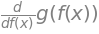

In [69]:
from sympy import symbols, Derivative

x, y, r, t = symbols('x y r t') # r (radius), t (angle theta)
f, g, h = symbols('f g h', cls=Function)
h = g(f(x))

Derivative(h, f(x)).doit()

In [70]:
# Never do this gives recursion ERROR (max depth exceeded)
# h = g(f(A))
# Derivative(h, A).doit()

In [71]:
from sympy.abc import a, b

Llower = lambd(sigmaApply(n(a, b)))
Llower

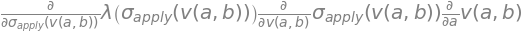

In [72]:
Derivative(Llower, a).doit()

In [73]:
# ### WAY 1: of substituting to differentiate with respect to expression:
n_ij = Function('n_ij')
n_ij(A,B) # (N[0,0]); n_ij

In [74]:
n_ij(A,B).args

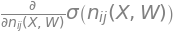

In [75]:
# sigma(n_ij).diff(n_ij).replace(n_ij, N[0,0]) # ERROR cannot deriv wi.r.t to the expression w11*x11 + ...

sigma(n_ij(A,B)).diff(n_ij(A,B))

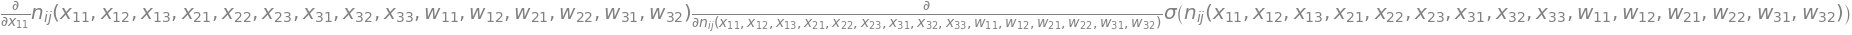

In [76]:
sigma(n_ij(*X,*W)).diff(X[0,0])

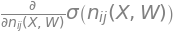

In [77]:
nab_ij = n_ij(A,B)
sigma(nab_ij).diff(nab_ij)#.subs({nab_ij : Nspec[0, 0]})

In [78]:
sigma(nab_ij).diff(nab_ij).subs({nab_ij : Nspec[2, 1]})

⎛d      
⎜──(σ(ξ)
⎝dξ     

 ⎞│     
)⎟│     
 ⎠│ξ=w₁₂

        
        
⋅x₃₁ + w

        
        
₂₂⋅x₃₂ +

        
        
 w₃₂⋅x₃₃

In [79]:
sigma(nab_ij).diff(nab_ij).subs({nab_ij : Nspec[2,1]}).subs({X[2,1]:77777})

⎛d      
⎜──(σ(ξ)
⎝dξ     

 ⎞│     
)⎟│     
 ⎠│ξ=w₁₂

        
        
⋅x₃₁ + 7

        
        
7777⋅w₂₂

        
        
 + w₃₂⋅x

  
  
₃₃

In [80]:
sigma(nab_ij).diff(nab_ij).subs({nab_ij : 23}) # ERROR if using replace() since it says can't calc derivs w.r.t to the x_11*w_11 + ...

⎛d      
⎜──(σ(ξ)
⎝dξ     

 ⎞│    
)⎟│    
 ⎠│ξ=23

In [81]:
sigma(nab_ij).diff(nab_ij).subs({nab_ij : Nspec[2,1]}).doit()

⎛d      
⎜──(σ(ξ)
⎝dξ     

 ⎞│     
)⎟│     
 ⎠│ξ=w₁₂

        
        
⋅x₃₁ + w

        
        
₂₂⋅x₃₂ +

        
        
 w₃₂⋅x₃₃

In [82]:
sigma(nab_ij).subs({nab_ij : Nspec[2,1]})#.diff(X[2,1])

In [83]:
# Substituting the value of the function n_ij first, and THEN differentiating with respect to something in that substitution. (X_21)
sigma(nab_ij).subs({nab_ij : Nspec[2,1]}).diff(X[2,1])

    ⎛ d 
w₂₂⋅⎜───
    ⎝dξ₁

       ⎞
(σ(ξ₁))⎟
       ⎠

│       
│       
│ξ₁=w₁₂⋅

        
        
x₃₁ + w₂

        
        
₂⋅x₃₂ + 

       
       
w₃₂⋅x₃₃

In [84]:
Selem[2,1].subs({Nelem[2,1] : Nspec[2,1]}).diff(X[2,1])




    ⎛ d 
w₂₂⋅⎜───
    ⎝dξ₁

       ⎞
(σ(ξ₁))⎟
       ⎠

│       
│       
│ξ₁=w₁₂⋅

        
        
x₃₁ + w₂

        
        
₂⋅x₃₂ + 

       
       
w₃₂⋅x₃₃

In [85]:
# ### WAY 2:
n_11 = Function('n_11')(Nspec[0, 0]); n_11

In [86]:
sigma(n_11)

In [87]:
assert Nspec[0,0] == n_11.args[0]

sigma(n_11).subs({n_11 : n_11.args[0]})

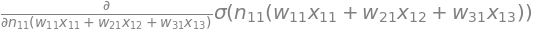

In [88]:
sigma(n_11).diff(n_11) #.replace(n_ij, n_ij.args[0])

In [89]:
sigma(n_11).diff(n_11).subs({n_11 : n_11.args[0]}).subs({X[0,0]:77777})

⎛d      
⎜──(σ(ξ)
⎝dξ     

 ⎞│     
)⎟│     
 ⎠│ξ=777

        
        
77⋅w₁₁ +

        
        
 w₂₁⋅x₁₂

        
        
 + w₃₁⋅x

  
  
₁₃

In [90]:
sigma(n_11).diff(n_11).subs({n_11 : n_11.args[0]}).replace(n_11.args[0], 23) # same as subs in this case

⎛d      
⎜──(σ(ξ)
⎝dξ     

 ⎞│    
)⎟│    
 ⎠│ξ=23

In [91]:
sigma(n_11).diff(X[0,0])

        
w₁₁⋅────
    ∂n₁₁

        
────────
(w₁₁⋅x₁₁

    ∂   
────────
 + w₂₁⋅x

        
────────
₁₂ + w₃₁

        
─────(σ(
⋅x₁₃)   

        
n₁₁(w₁₁⋅
        

        
x₁₁ + w₂
        

        
₁⋅x₁₂ + 
        

        
w₃₁⋅x₁₃)
        

   ⎛ d  
))⋅⎜───(
   ⎝dξ₁ 

        
n₁₁(ξ₁))
        

⎞│      
⎟│      
⎠│ξ₁=w₁₁

        
        
⋅x₁₁ + w

        
        
₂₁⋅x₁₂ +

        
        
 w₃₁⋅x₁₃

In [92]:
id = Lambda(x, x)

sigma(n_11).diff(X[0,0]).subs({n_11 : id})

    ⎛ d 
w₁₁⋅⎜───
    ⎝dξ₁

        
(n₁₁(ξ₁)
        

 ⎞│     
)⎟│     
 ⎠│ξ₁=w₁

        
        
₁⋅x₁₁ + 

        
        
w₂₁⋅x₁₂ 

        
        
+ w₃₁⋅x₁

  ⎛d    
 ⋅⎜──(σ(
₃ ⎝dξ   

   ⎞│   
ξ))⎟│   
   ⎠│ξ=x

    
    
 ↦ x

In [93]:
# NOTE: so I don't think WAY 2 is correct because here it doesn't simplify the derivative d n11 / d eps11, since this should equal 1 because now n11 = eps11. Correct one is below (repeated from above)
sigma(n_11).diff(X[0,0]).subs({n_11 : Nspec[0,0]})

    ⎛ d 
w₁₁⋅⎜───
    ⎝dξ₁

        
(n₁₁(ξ₁)
        

 ⎞│     
)⎟│     
 ⎠│ξ₁=w₁

        
        
₁⋅x₁₁ + 

        
        
w₂₁⋅x₁₂ 

        
        
+ w₃₁⋅x₁

  ⎛d    
 ⋅⎜──(σ(
₃ ⎝dξ   

   ⎞│   
ξ))⎟│   
   ⎠│ξ=w

        
        
₁₁⋅x₁₁ +

        
        
 w₂₁⋅x₁₂

        
        
 + w₃₁⋅x

  
  
₁₃

In [94]:
# CORRECT WAY 1
sigma(n_11).subs({n_11 : Nspec[0,0]}).diff(X[0,0])

    ⎛ d 
w₁₁⋅⎜───
    ⎝dξ₁

       ⎞
(σ(ξ₁))⎟
       ⎠

│       
│       
│ξ₁=w₁₁⋅

        
        
x₁₁ + w₂

        
        
₁⋅x₁₂ + 

       
       
w₃₁⋅x₁₃

In [95]:
# CORRECT WAY 2

sigma(nab_ij).subs({nab_ij : Nspec[0,0]}).diff(X[0,0])

    ⎛ d 
w₁₁⋅⎜───
    ⎝dξ₁

       ⎞
(σ(ξ₁))⎟
       ⎠

│       
│       
│ξ₁=w₁₁⋅

        
        
x₁₁ + w₂

        
        
₁⋅x₁₂ + 

       
       
w₃₁⋅x₁₃

In [96]:
# CORRECT WAY 3
Selem[2,1].subs({Nelem[2,1] : Nspec[2,1]}).diff(X[2,1])

    ⎛ d 
w₂₂⋅⎜───
    ⎝dξ₁

       ⎞
(σ(ξ₁))⎟
       ⎠

│       
│       
│ξ₁=w₁₂⋅

        
        
x₃₁ + w₂

        
        
₂⋅x₃₂ + 

       
       
w₃₂⋅x₃₃

In [97]:
sigma(n_11) # WAY 1: sigma argument is already hardcoded

In [98]:
sigma(nab_ij) # Way 2: sigma argument is function of matrixsymbol (better than 1)

In [99]:
Selem[2,1] # WAY 3: sigma argument is just symbol and we replace it as function with argument hardcoded only later. (better than 2)




In [100]:
L

In [101]:
assert Selem == S.replace(n, vN).replace(sigmaApply, sigmaApply_)

Selem

⎡σ(n₁₁) 
⎢       
⎢σ(n₂₁) 
⎢       
⎣σ(n₃₁) 

 σ(n₁₂)⎤
       ⎥
 σ(n₂₂)⎥
       ⎥
 σ(n₃₂)⎦

In [102]:
L.replace(n, vN).replace(sigmaApply, sigmaApply_)

 ⎛⎡σ(n₁₁
 ⎜⎢     
λ⎜⎢σ(n₂₁
 ⎜⎢     
 ⎝⎣σ(n₃₁

)  σ(n₁₂
        
)  σ(n₂₂
        
)  σ(n₃₂

)⎤⎞
 ⎥⎟
)⎥⎟
 ⎥⎟
)⎦⎠

In [103]:
#L.replace(n, vN).replace(sigmaApply, sigmaApply_).diff(Nelem[0,0])

In [104]:
Lsum = L.replace(n, vN).replace(sigmaApply, sigmaApply_).replace(lambd, lambd_)
Lsum

In [105]:
Lsum.diff(Nelem)

⎡ d     
⎢────(σ(
⎢dn₁₁   
⎢       
⎢ d     
⎢────(σ(
⎢dn₂₁   
⎢       
⎢ d     
⎢────(σ(
⎣dn₃₁   

        
n₁₁))  ─
       d
        
        
n₂₁))  ─
       d
        
        
n₃₁))  ─
       d

d       
───(σ(n₁
n₁₂     
        
d       
───(σ(n₂
n₂₂     
        
d       
───(σ(n₃
n₃₂     

   ⎤
₂))⎥
   ⎥
   ⎥
   ⎥
₂))⎥
   ⎥
   ⎥
   ⎥
₂))⎥
   ⎦

In [106]:
Lsum.subs(elemToSpec)#.diff(X[2,1])

In [107]:
Lsum.subs(elemToSpec).diff(X)

⎡    ⎛ d
⎢w₁₁⋅⎜──
⎢    ⎝dξ
⎢       
⎢    ⎛ d
⎢w₁₁⋅⎜──
⎢    ⎝dξ
⎢       
⎢    ⎛ d
⎢w₁₁⋅⎜──
⎣    ⎝dξ

        
─(σ(ξ₁))
₁       
        
        
─(σ(ξ₁))
₁       
        
        
─(σ(ξ₁))
₁       

⎞│      
⎟│      
⎠│ξ₁=w₁₁
        
⎞│      
⎟│      
⎠│ξ₁=w₁₁
        
⎞│      
⎟│      
⎠│ξ₁=w₁₁

        
        
⋅x₁₁ + w
        
        
        
⋅x₂₁ + w
        
        
        
⋅x₃₁ + w

        
        
₂₁⋅x₁₂ +
        
        
        
₂₁⋅x₂₂ +
        
        
        
₂₁⋅x₃₂ +

        
        
 w₃₁⋅x₁₃
        
        
        
 w₃₁⋅x₂₃
        
        
        
 w₃₁⋅x₃₃

       ⎛
 + w₁₂⋅⎜
       ⎝
        
       ⎛
 + w₁₂⋅⎜
       ⎝
        
       ⎛
 + w₁₂⋅⎜
       ⎝

 d      
───(σ(ξ₁
dξ₁     
        
 d      
───(σ(ξ₁
dξ₁     
        
 d      
───(σ(ξ₁
dξ₁     

  ⎞│    
))⎟│    
  ⎠│ξ₁=w
        
  ⎞│    
))⎟│    
  ⎠│ξ₁=w
        
  ⎞│    
))⎟│    
  ⎠│ξ₁=w

        
        
₁₂⋅x₁₁ +
        
        
        
₁₂⋅x₂₁ +
        
        
        
₁₂⋅x₃₁ +



In [108]:

specToElemD = {v : k for k, v in elemToSpecD.items()}

Lsum.subs(elemToSpecD).diff(X).subs(specToElemD)

⎡    ⎛ d
⎢w₁₁⋅⎜──
⎢    ⎝dξ
⎢       
⎢    ⎛ d
⎢w₁₁⋅⎜──
⎢    ⎝dξ
⎢       
⎢    ⎛ d
⎢w₁₁⋅⎜──
⎣    ⎝dξ

        
─(σ(ξ₁))
₁       
        
        
─(σ(ξ₁))
₁       
        
        
─(σ(ξ₁))
₁       

⎞│      
⎟│      
⎠│ξ₁=n₁₁
        
⎞│      
⎟│      
⎠│ξ₁=n₂₁
        
⎞│      
⎟│      
⎠│ξ₁=n₃₁

       ⎛
 + w₁₂⋅⎜
       ⎝
        
       ⎛
 + w₁₂⋅⎜
       ⎝
        
       ⎛
 + w₁₂⋅⎜
       ⎝

 d      
───(σ(ξ₁
dξ₁     
        
 d      
───(σ(ξ₁
dξ₁     
        
 d      
───(σ(ξ₁
dξ₁     

  ⎞│    
))⎟│    
  ⎠│ξ₁=n
        
  ⎞│    
))⎟│    
  ⎠│ξ₁=n
        
  ⎞│    
))⎟│    
  ⎠│ξ₁=n

        
    w₂₁⋅
₁₂      
        
        
    w₂₁⋅
₂₂      
        
        
    w₂₁⋅
₃₂      

⎛ d     
⎜───(σ(ξ
⎝dξ₁    
        
⎛ d     
⎜───(σ(ξ
⎝dξ₁    
        
⎛ d     
⎜───(σ(ξ
⎝dξ₁    

   ⎞│   
₁))⎟│   
   ⎠│ξ₁=
        
   ⎞│   
₁))⎟│   
   ⎠│ξ₁=
        
   ⎞│   
₁))⎟│   
   ⎠│ξ₁=

        
    + w₂
n₁₁     
        
        
    + w₂
n₂₁     
        
        
    + w₂
n₃₁     

